In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from pathlib import Path



In [2]:
# Load your dataset (adjust the path if needed)
data = pd.read_csv(r"C:\Users\student\Downloads\titanic.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Make a clean copy
data = data.copy()

# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop columns that aren’t useful
data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True, errors='ignore')


In [4]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [5]:
X = data.drop(['Survived', 'PassengerId'], axis=1, errors='ignore')
y = data['Survived']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model_rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    criterion='entropy',   # or 'gini'
    max_depth=6,           # limit tree depth to avoid overfitting
    random_state=42
)

model_rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=6, random_state=42)

In [8]:
y_pred_rf = model_rf.predict(X_test)

print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)


✅ Random Forest Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[96  9]
 [23 51]]


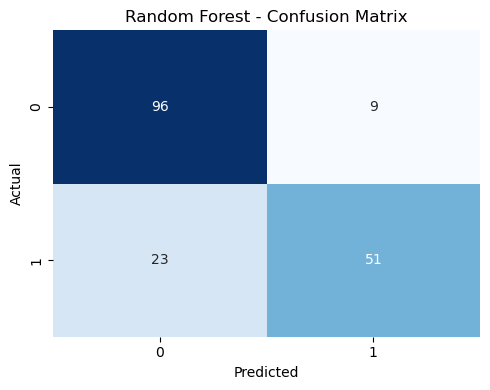

Saved confusion matrix to: C:\Users\student\outputs\rf_confusion_matrix.png


In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.tight_layout()

# Save figure (safe path)
out_dir = Path.cwd() / "outputs"
out_dir.mkdir(parents=True, exist_ok=True)
conf_matrix_path = out_dir / "rf_confusion_matrix.png"
plt.savefig(conf_matrix_path, bbox_inches="tight")
plt.show()

print("Saved confusion matrix to:", conf_matrix_path)


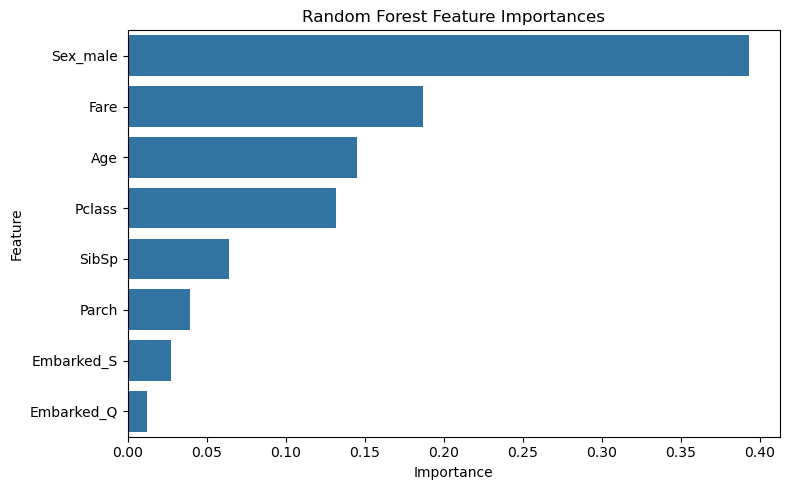

Saved feature importance plot to: C:\Users\student\outputs\rf_feature_importances.png


In [10]:
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Random Forest Feature Importances")
plt.tight_layout()

feat_imp_path = out_dir / "rf_feature_importances.png"
plt.savefig(feat_imp_path, bbox_inches="tight")
plt.show()

print("Saved feature importance plot to:", feat_imp_path)


In [11]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
tree_model.fit(X_train, y_train)

acc_tree = accuracy_score(y_test, tree_model.predict(X_test))
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {acc_tree:.3f}")
print(f"Random Forest Accuracy: {acc_rf:.3f}")


Decision Tree Accuracy: 0.799
Random Forest Accuracy: 0.821
